# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

# <div style='padding:7px;background-color:Maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>CLassification Modeling<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [26]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, balanced_accuracy_score
import xgboost as xg

from sklearn import svm

import pickle
import os




## <span style="color:Aqua;">Reading model dataset:</span>

In [27]:
df = pd.read_feather('transfered_data.feather')
df.sample(3)

months_as_customer policy_bind_date policy_state  policy_deductable  \
38                  431       2002-11-25           IN               2000   
120                 255       2013-01-08           IL               2000   
327                 276       1993-06-18           IN               1000   

    insured_sex insured_education_level insured_occupation insured_hobbies  \
38       FEMALE                      MD       craft-repair  bungie-jumping   
120        MALE             High School    priv-house-serv     board-games   
327        MALE                     PhD       craft-repair        yachting   

    insured_relationship incident_date             incident_type  \
38             unmarried    2015-01-21   Multi-vehicle Collision   
120       other-relative    2015-02-22  Single Vehicle Collision   
327            own-child    2015-01-12   Multi-vehicle Collision   

     collision_type incident_severity authorities_contacted incident_state  \
38   Rear Collision      Major Damage                Police             NY   
120  Side Collision      Minor Damage                  Fire             SC   
327  Rear Collision      Minor Damage                Police             NY   

    incident_city incident_hour_of_the_day number_of_vehicles_involved  \
38      Hillsdale                        4                           3   
120     Hillsdale                       22                           1   
327     Arlington                       23                           3   

    property_damage bodily_injuries witnesses police_report_available  \
38              YES               2         0                     YES   
120              NO               2         0                      NO   
327             YES               0         0                     YES   

      auto_make auto_year fraud_reported  age_boxcox  \
38         Jeep      2007              N      4.6535   
120  Volkswagen      2000              N      4.2853   
327   Chevrolet      2014              N      4.4669   

     policy_annual_premium_boxcox  total_claim_amount_boxcox  \
38                      1158.5502                130211.7650   
120                     1170.3476                145975.4196   
327                     1729.4532                138033.2063   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  
38              -23360               -11112           101784.8546  
120             -10688               -10688            96644.4589  
327              12736               -29184           112562.3037

In [65]:
ordinal = ['insured_education_level','incident_severity',]

nominal = ['policy_state','insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_type',
           'collision_type','authorities_contacted','incident_state','incident_city','property_damage',
           'police_report_available','auto_make','fraud_reported']

discrete = ['months_as_customer','incident_hour_of_the_day','number_of_vehicles_involved','auto_year',
            'policy_deductable','witnesses','bodily_injuries']
continuous = [
    'age_boxcox','policy_annual_premium_boxcox','total_claim_amount_boxcox','injury_claim_cube',
    'property_claim_cube','vehicle_claim_boxcox',]

date = ['policy_bind_date','incident_date']

len(ordinal + nominal + discrete +continuous + date)

31

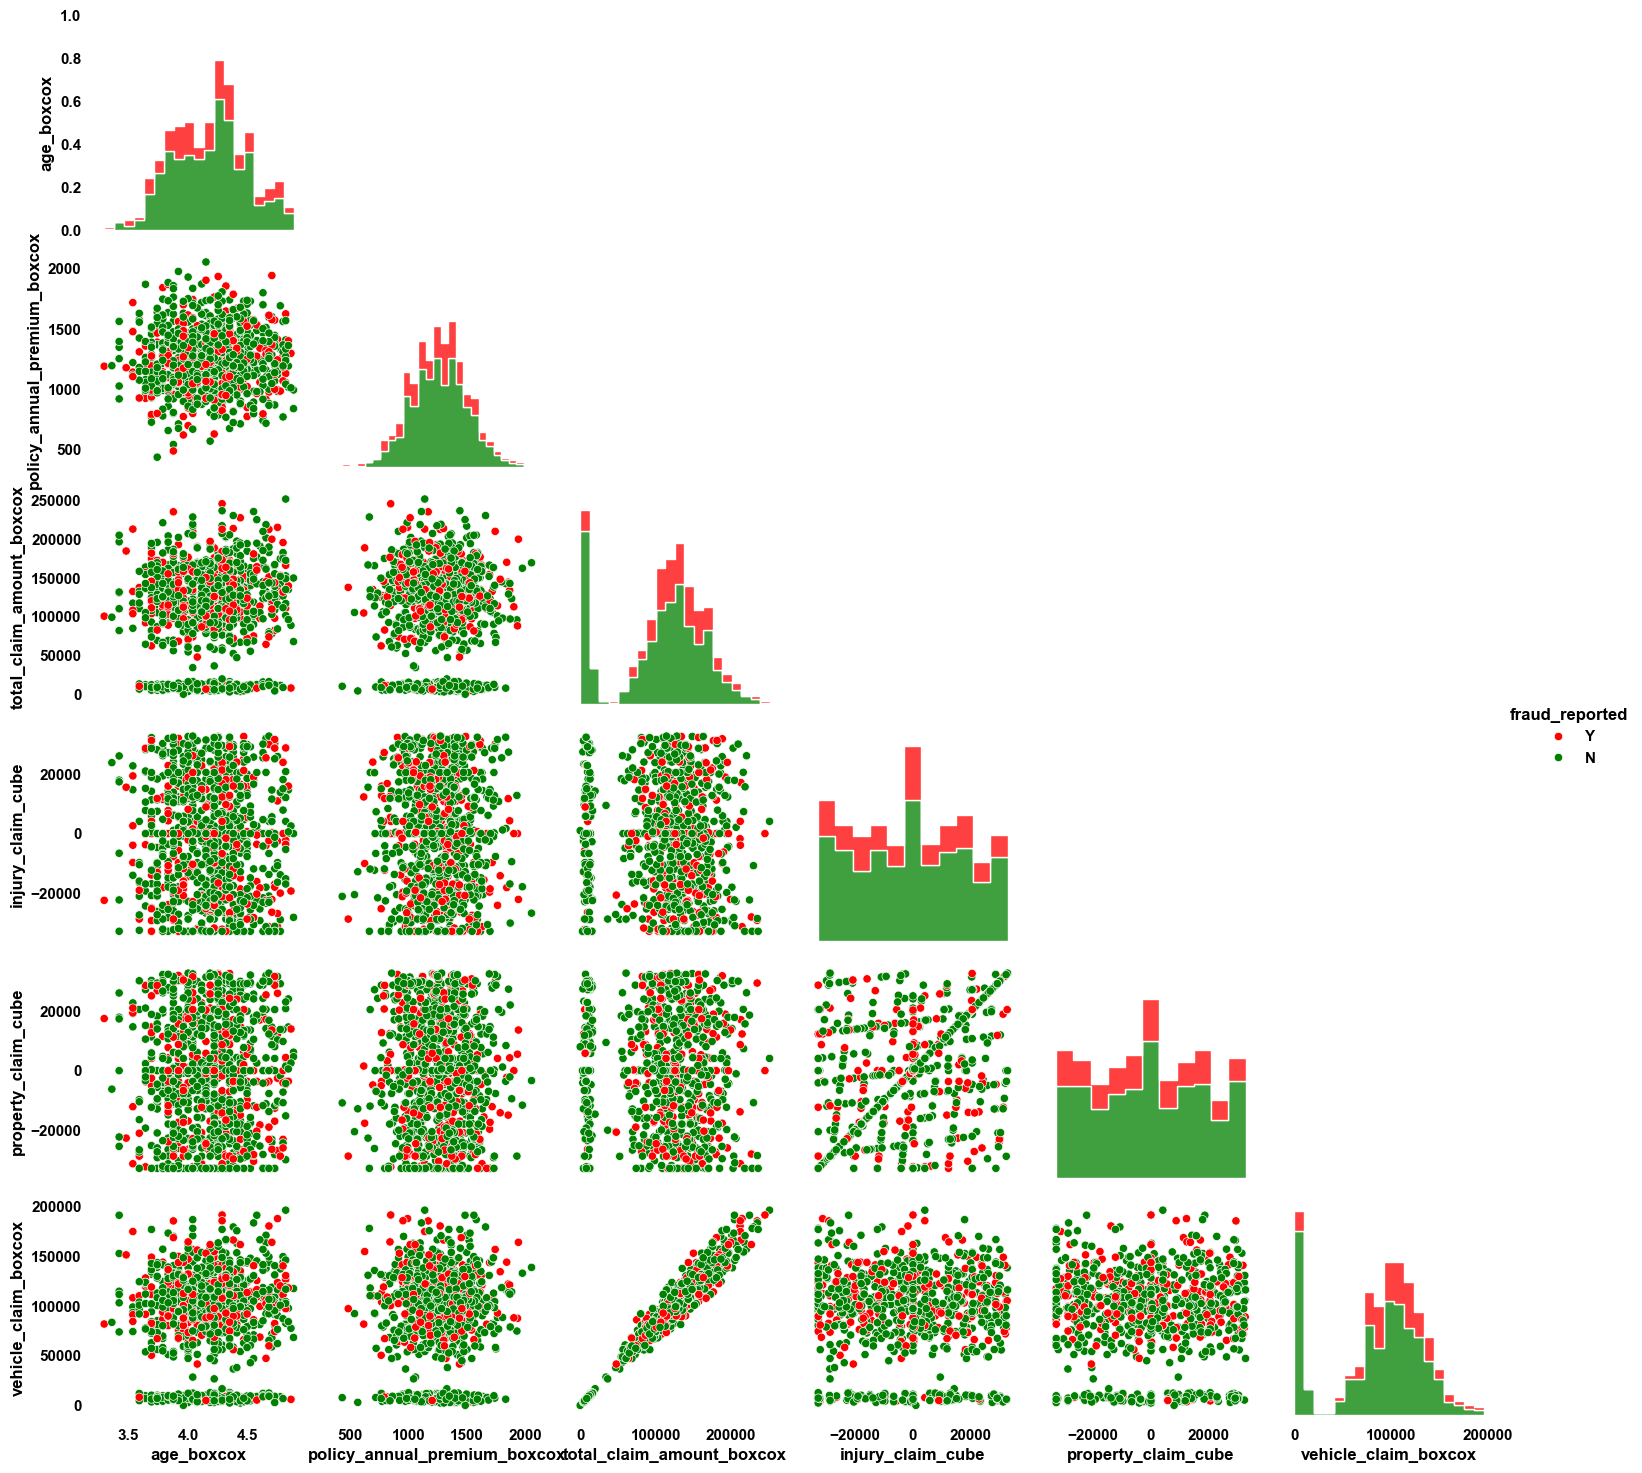

In [29]:
grid = sns.PairGrid(df,vars = [
    'age_boxcox','policy_annual_premium_boxcox','total_claim_amount_boxcox','injury_claim_cube',
    'property_claim_cube','vehicle_claim_boxcox',] , hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element='step')

grid.add_legend()

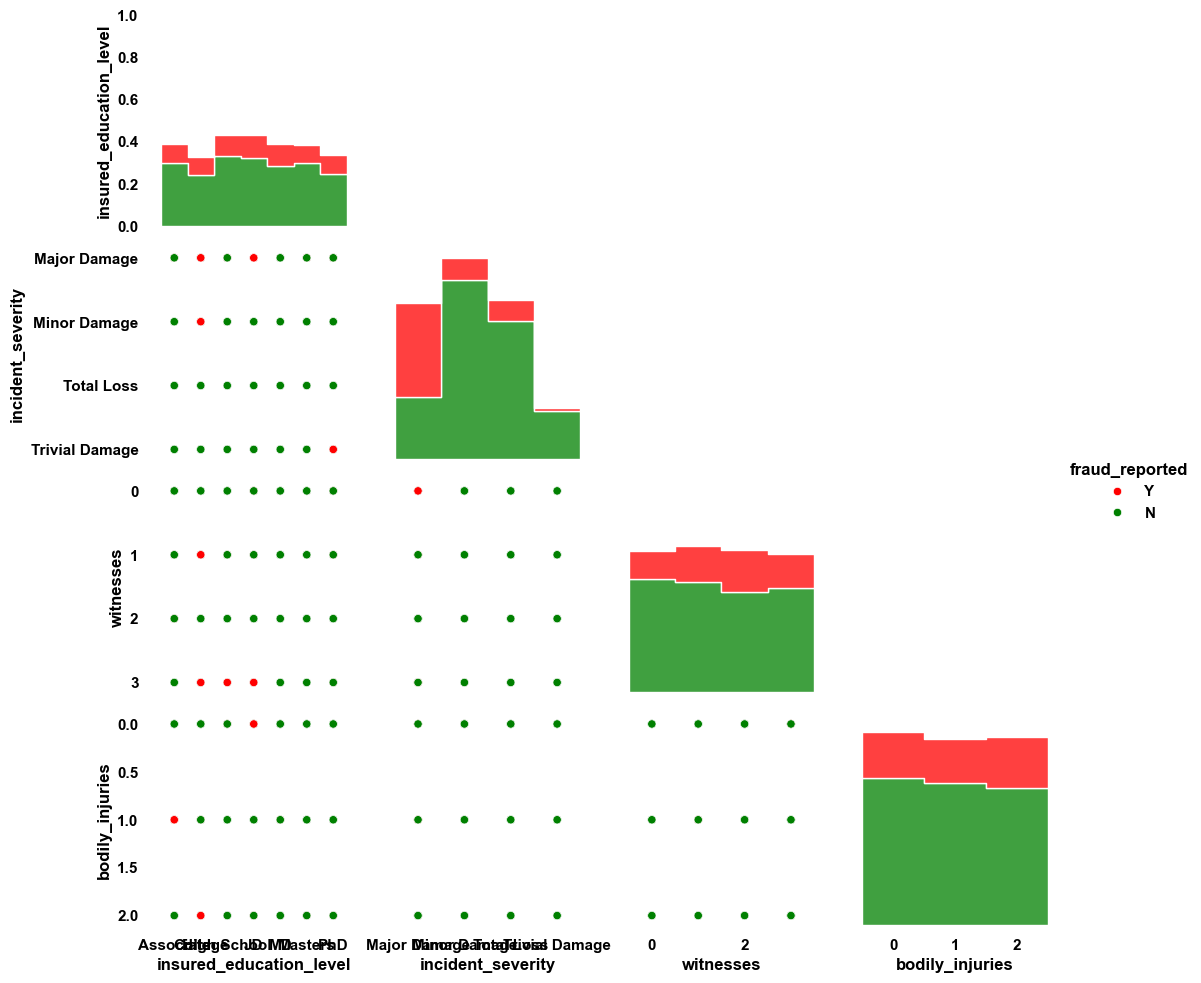

In [30]:
grid = sns.PairGrid(df,vars = ['insured_education_level','incident_severity','witnesses','bodily_injuries',] , 
                    hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element="step")

grid.add_legend()

In [32]:
grid = sns.PairGrid(df,vars = ['insured_education_level','incident_severity','witnesses','bodily_injuries',] ['policy_state','insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_type',
           'collision_type','authorities_contacted','incident_state','incident_city','property_damage',
           'police_report_available','auto_make','fraud_reported'], 
                    hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element="step")

grid.add_legend()

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/tmp/ipykernel_1851/3242004326.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  grid = sns.PairGrid(df,vars = ['insured_education_level','incident_severity','witnesses','bodily_injuries',] ['policy_state','insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_type',


TypeError: list indices must be integers or slices, not tuple

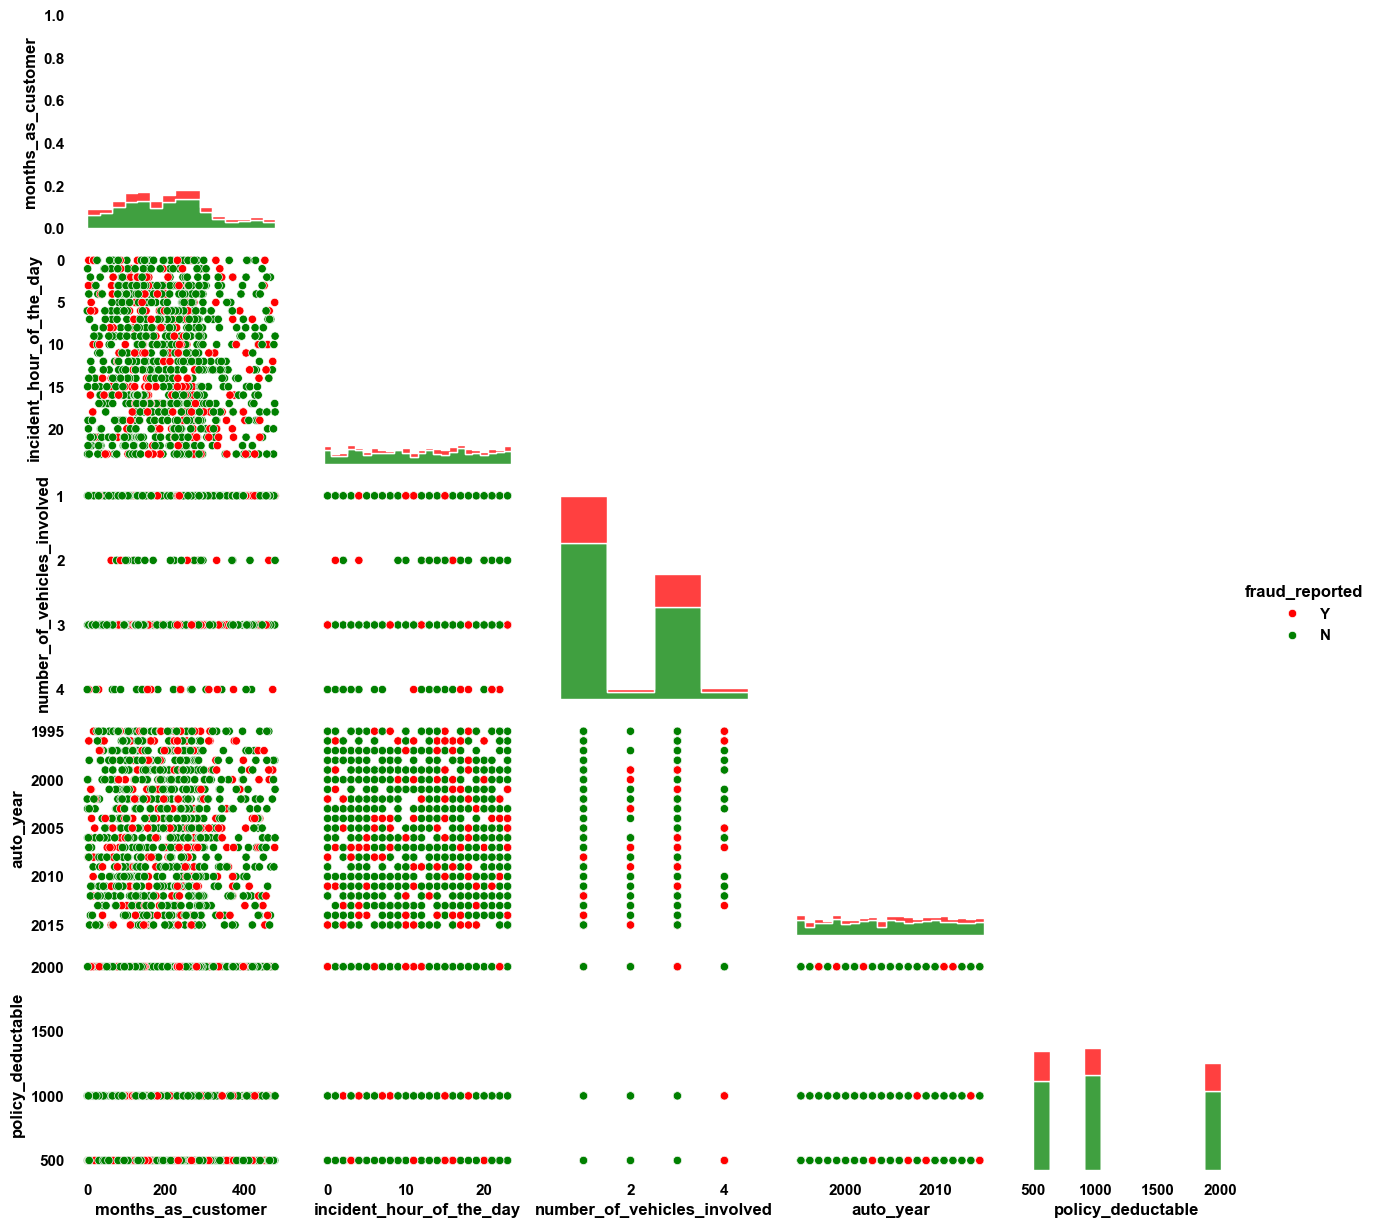

In [ ]:
grid = sns.PairGrid(df,vars = ['months_as_customer','incident_hour_of_the_day','number_of_vehicles_involved','auto_year','policy_deductable'], 
                    hue='fraud_reported',hue_order=['Y','N'],palette=['red','green'])
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.histplot,multiple="stack",element="step")

grid.add_legend()

<Axes: xlabel='auto_year', ylabel='Count'>

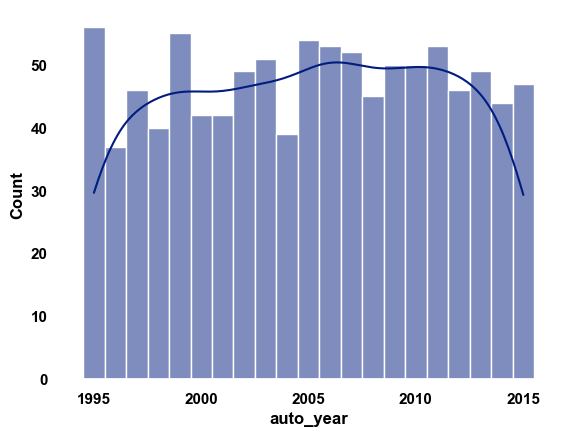

In [33]:
sns.histplot(data=df,x='auto_year',kde=True)

<Axes: xlabel='auto_year'>

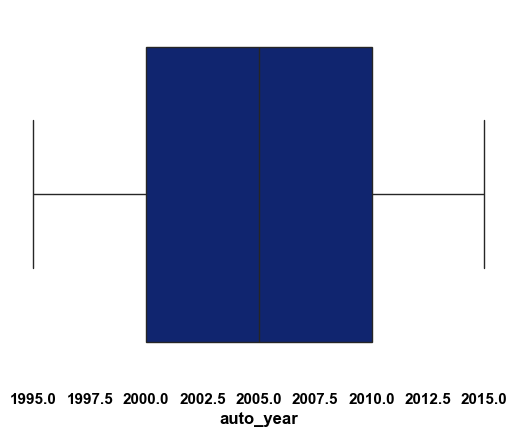

In [35]:
sns.boxplot(data=df,x='auto_year')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   months_as_customer            1000 non-null   int16         
 1   policy_bind_date              1000 non-null   datetime64[ns]
 2   policy_state                  1000 non-null   category      
 3   policy_deductable             1000 non-null   int16         
 4   insured_sex                   1000 non-null   category      
 5   insured_education_level       1000 non-null   category      
 6   insured_occupation            1000 non-null   category      
 7   insured_hobbies               1000 non-null   category      
 8   insured_relationship          1000 non-null   category      
 9   incident_date                 1000 non-null   datetime64[ns]
 10  incident_type                 1000 non-null   category      
 11  collision_type                1

## <span style="color:Aqua;"> Encoding Categorical Features:</span> 

In [37]:
df.sample(2)

months_as_customer policy_bind_date policy_state  policy_deductable  \
667                 204       1993-08-30           OH               2000   
991                 257       2006-07-12           OH               1000   

    insured_sex insured_education_level insured_occupation insured_hobbies  \
667        MALE                      JD  machine-op-inspct          hiking   
991        MALE                      MD      other-service      basketball   

    insured_relationship incident_date             incident_type  \
667              husband    2015-02-27  Single Vehicle Collision   
991       other-relative    2015-02-06  Single Vehicle Collision   

     collision_type incident_severity authorities_contacted incident_state  \
667  Rear Collision        Total Loss             Ambulance             SC   
991  Rear Collision        Total Loss                 Other             WV   

    incident_city incident_hour_of_the_day number_of_vehicles_involved  \
667     Arlington                        7                           1   
991     Riverwood                       21                           1   

    property_damage bodily_injuries witnesses police_report_available  \
667             YES               1         1                      NO   
991              NO               0         1                      NO   

    auto_make auto_year fraud_reported  age_boxcox  \
667      Audi      1997              N      4.2527   
991    Accura      2002              N      4.3790   

     policy_annual_premium_boxcox  total_claim_amount_boxcox  \
667                     1772.5665                 94471.6536   
991                     1284.3895                 96184.4104   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  
667              10752                20480            76659.1952  
991                  0                  576            97099.3895

In [38]:
insured_sex_map = { 'FEMALE': 0,'MALE':1  }
property_damage_map = { 'NO':0, 'YES':1 }
police_report_available_map = { 'NO':0, 'YES':1 }
fraud_reported_map = { 'N':0, 'Y':1 }

In [39]:
df['insured_sex'] = pd.to_numeric(df['insured_sex'].map(insured_sex_map),downcast='integer')
df['property_damage'] = pd.to_numeric(df['property_damage'].map(property_damage_map),downcast='integer')
df['police_report_available'] = pd.to_numeric(df['police_report_available'].map(police_report_available_map),downcast='integer')
df['fraud_reported'] = pd.to_numeric(df['fraud_reported'].map(fraud_reported_map),downcast='integer')

In [46]:
policy_state = pd.get_dummies(df['policy_state'],dtype='int8')
insured_occupation = pd.get_dummies(df['insured_occupation'],dtype='int8')
insured_hobbies = pd.get_dummies(df['insured_hobbies'],dtype='int8')
insured_relationship = pd.get_dummies(df['insured_relationship'],dtype='int8')
incident_type = pd.get_dummies(df['incident_type'],dtype='int8')
collision_type = pd.get_dummies(df['collision_type'],dtype='int8')
authorities_contacted = pd.get_dummies(df['authorities_contacted'],dtype='int8')
incident_state = pd.get_dummies(df['incident_state'],dtype='int8')
incident_city = pd.get_dummies(df['incident_city'],dtype='int8')
auto_make = pd.get_dummies(df['auto_make'],dtype='int8')

en = LabelEncoder()
df['insured_education_level'] = en.fit_transform(df['insured_education_level']).astype('int8')

en1 = LabelEncoder()
df['incident_severity'] = en.fit_transform(df['incident_severity']).astype('int8')


df1= pd.concat([df,policy_state,insured_hobbies,insured_occupation,insured_relationship,incident_type,collision_type,
                authorities_contacted,incident_state,incident_city,auto_make],axis=1)
df1 = df1.drop(['policy_state','insured_hobbies','insured_occupation','insured_relationship','incident_type','collision_type',
                'authorities_contacted','incident_state','incident_city','auto_make'],axis=1)

In [47]:
df1

months_as_customer policy_bind_date  policy_deductable  insured_sex  \
0                   328       2014-10-17               1000            1   
1                   228       2006-06-27               2000            1   
2                   134       2000-09-06               2000            0   
3                   256       1990-05-25               2000            0   
4                   228       2014-06-06               1000            1   
..                  ...              ...                ...          ...   
995                   3       1991-07-16               1000            0   
996                 285       2014-01-05               1000            0   
997                 130       2003-02-17                500            0   
998                 458       2011-11-18               2000            1   
999                 456       1996-11-11               1000            0   

     insured_education_level incident_date  incident_severity  \
0                          4    2015-01-25                  0   
1                          4    2015-01-21                  1   
2                          6    2015-02-22                  1   
3                          6    2015-01-10                  0   
4                          0    2015-02-17                  1   
..                       ...           ...                ...   
995                        5    2015-02-22                  1   
996                        6    2015-01-24                  0   
997                        5    2015-01-23                  1   
998                        0    2015-02-26                  0   
999                        0    2015-02-26                  1   

    incident_hour_of_the_day number_of_vehicles_involved  property_damage  \
0                          5                           1                1   
1                          8                           1                1   
2                          7                           3                0   
3                          5                           1                1   
4                         20                           1                0   
..                       ...                         ...              ...   
995                       20                           1                1   
996                       23                           1                1   
997                        4                           3                1   
998                        2                           1                1   
999                        6                           1                1   

    bodily_injuries witnesses  police_report_available auto_year  \
0                 1         2                        0      2004   
1                 0         0                        0      2007   
2                 2         3                        0      2007   
3                 1         2                        0      2014   
4                 0         1                        0      2009   
..              ...       ...                      ...       ...   
995               0         1                        0      2006   
996               2         3                        0      2015   
997               2         3                        1      1996   
998               0         1                        1      1998   
999               0         3                        0      2007   

     fraud_reported  age_boxcox  policy_annual_premium_boxcox  \
0                 1      4.4951                     1410.9388   
1                 1      4.3172                     1200.3887   
2                 0      3.8331                     1417.1946   
3                 1      4.2853                     1419.8054   
4                 0      4.3790                     1588.6789   
..              ...         ...                           ...   
995               0      4.1851                     1314.4322   
996               0      4.2853                  

## <span style="color:Aqua;">Preparing the data afor modeling:</span>

In [49]:
df1.drop_duplicates()

months_as_customer policy_bind_date  policy_deductable  insured_sex  \
0                   328       2014-10-17               1000            1   
1                   228       2006-06-27               2000            1   
2                   134       2000-09-06               2000            0   
3                   256       1990-05-25               2000            0   
4                   228       2014-06-06               1000            1   
..                  ...              ...                ...          ...   
995                   3       1991-07-16               1000            0   
996                 285       2014-01-05               1000            0   
997                 130       2003-02-17                500            0   
998                 458       2011-11-18               2000            1   
999                 456       1996-11-11               1000            0   

     insured_education_level incident_date  incident_severity  \
0                          4    2015-01-25                  0   
1                          4    2015-01-21                  1   
2                          6    2015-02-22                  1   
3                          6    2015-01-10                  0   
4                          0    2015-02-17                  1   
..                       ...           ...                ...   
995                        5    2015-02-22                  1   
996                        6    2015-01-24                  0   
997                        5    2015-01-23                  1   
998                        0    2015-02-26                  0   
999                        0    2015-02-26                  1   

    incident_hour_of_the_day number_of_vehicles_involved  property_damage  \
0                          5                           1                1   
1                          8                           1                1   
2                          7                           3                0   
3                          5                           1                1   
4                         20                           1                0   
..                       ...                         ...              ...   
995                       20                           1                1   
996                       23                           1                1   
997                        4                           3                1   
998                        2                           1                1   
999                        6                           1                1   

    bodily_injuries witnesses  police_report_available auto_year  \
0                 1         2                        0      2004   
1                 0         0                        0      2007   
2                 2         3                        0      2007   
3                 1         2                        0      2014   
4                 0         1                        0      2009   
..              ...       ...                      ...       ...   
995               0         1                        0      2006   
996               2         3                        0      2015   
997               2         3                        1      1996   
998               0         1                        1      1998   
999               0         3                        0      2007   

     fraud_reported  age_boxcox  policy_annual_premium_boxcox  \
0                 1      4.4951                     1410.9388   
1                 1      4.3172                     1200.3887   
2                 0      3.8331                     1417.1946   
3                 1      4.2853                     1419.8054   
4                 0      4.3790                     1588.6789   
..              ...         ...                           ...   
995               0      4.1851                     1314.4322   
996               0      4.2853                  

In [55]:
x = df1.drop(['policy_bind_date','incident_date','fraud_reported'],axis=1)
y = df1[['fraud_reported']]

In [56]:
x.describe().T

count      mean      std      min      25%  \
months_as_customer      1000.0000  203.9540 115.1132   0.0000 115.7500   
policy_deductable       1000.0000 1136.0000 611.8647 500.0000 500.0000   
insured_sex             1000.0000    0.4630   0.4989   0.0000   0.0000   
insured_education_level 1000.0000    2.9660   1.9485   0.0000   1.0000   
incident_severity       1000.0000    1.1840   0.9397   0.0000   0.0000   
...                           ...       ...      ...      ...      ...   
Nissan                  1000.0000    0.0780   0.2683   0.0000   0.0000   
Saab                    1000.0000    0.0800   0.2714   0.0000   0.0000   
Suburu                  1000.0000    0.0800   0.2714   0.0000   0.0000   
Toyota                  1000.0000    0.0700   0.2553   0.0000   0.0000   
Volkswagen              1000.0000    0.0680   0.2519   0.0000   0.0000   

                              50%       75%       max  
months_as_customer       199.5000  276.2500  479.0000  
policy_deductable       1000.0000 2000.0000 2000.0000  
insured_sex                0.0000    1.0000    1.0000  
insured_education_level    3.0000    5.0000    6.0000  
incident_severity          1.0000    2.0000    3.0000  
...                           ...       ...       ...  
Nissan                     0.0000    0.0000    1.0000  
Saab                       0.0000    0.0000    1.0000  
Suburu                     0.0000    0.0000    1.0000  
Toyota                     0.0000    0.0000    1.0000  
Volkswagen                 0.0000    0.0000    1.0000  

[96 rows x 8 columns]

In [57]:
y.describe()

fraud_reported
count       1000.0000
mean           0.2470
std            0.4315
min            0.0000
25%            0.0000
50%            0.0000
75%            0.0000
max            1.0000

In [58]:
y.value_counts()

fraud_reported
0                 753
1                 247
Name: count, dtype: int64

In [87]:
original_features=['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date','num_of_delayed_payment',
     'num_credit_inquiries', 'credit_mix','payment_of_min_amount',  'age_boxcox',
     'total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',]

all_features = ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
    'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox','total_credit_exposure_boxcox',
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec','debt_paytime_log','interest_rate_boxcox',
    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',
             'income_stability_boxcox','total_liability_boxcox','investment_to_income_ratio_square',
             'outstanding_debt_square','credit_inquiry_per_loan','changed_credit_limit_cube']

revised_features = ['num_bank_accounts','num_credit_card','num_of_loan','num_of_delayed_payment', 'delay_from_due_date',
                    'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
                    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox',
                    'annual_income_boxcox','total_liability_boxcox','outstanding_debt_square','savings_rate_rec']

imp_fea = ['credit_mix','outstanding_debt_square','credit_utilization_ratio_log','interest_rate_boxcox','payment_of_min_amount',
    'total_liability_boxcox','num_credit_card','num_bank_accounts','Cluster','total_credit_exposure_boxcox',
    'num_credit_inquiries','num_of_delayed_payment','delay_from_due_date','credit_limit_change_rate_exp',
    'loan_income_ratio_month_boxcox','disposable_income','annual_income_boxcox','total_emi_per_month_square',
    'monthly_inhand_salary_boxcox','debt_income_ratio_log','amount_invested_monthly_boxcox','savings_rate_rec',
    'income_stability_boxcox','age_boxcox','changed_credit_limit_cube']

new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','credit_mix','outstanding_debt_square','credit_history_age_boxcox','total_liability_boxcox','credit_history_age_boxcox',
           
        ]

## <span style="color:Aqua;">Splitting data for train_test and resampling imbalanced data classess:</span>

In [59]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train) 

In [60]:
print(x_train.shape,'----', y_train.shape)
print(x_test.shape,'----', y_test.shape)

(1114, 101) ---- (1114, 1)
(200, 101) ---- (200, 1)


In [61]:
x_test.sample(2)

months_as_customer  policy_deductable  insured_sex  \
451                  88               1000            0   
741                 100                500            1   

     insured_education_level  incident_severity incident_hour_of_the_day  \
451                        1                  2                        3   
741                        1                  1                        4   

    number_of_vehicles_involved  property_damage bodily_injuries witnesses  \
451                           1                0               2         0   
741                           1                0               1         2   

     police_report_available auto_year  age_boxcox  \
451                        1      2003      3.8769   
741                        0      2004      4.0005   

     policy_annual_premium_boxcox  total_claim_amount_boxcox  \
451                     1442.0374                116134.6551   
741                     1127.4655                 82674.0065   

     injury_claim_cube  property_claim_cube  vehicle_claim_boxcox  IL  IN  OH  \
451              12288                    0            97706.2294   0   1   0   
741             -28672               -28672            60924.7358   0   0   1   

     base-jumping  basketball  board-games  bungie-jumping  ...  PA  SC  VA  \
451             0           0            0               0  ...   0   1   0   
741             0           0            0               0  ...   0   0   0   

     WV  Arlington  Columbus  Hillsdale  Northbend  Northbrook  Riverwood  \
451   0          0         0          0          0           1          0   
741   0          0         1          0          0           0          0   

     Springfield  Accura  Audi  BMW  Chevrolet  Dodge  Ford  Honda  Jeep  \
451            0       0     0    0          1      0     0      0     0   
741            0       0     0    1          0      0     0      0     0   

     Mercedes  Nissan  Saab  Suburu  Toyota  Volkswagen  
451         0       0     0       0       0           0  
741         0       0     0       0       0           0  

[2 rows x 101 columns]

In [62]:
y_test.sample(2)

fraud_reported
998               0
749               0

## <span style="color:Aqua;">Normalizing / Scaling the data:</span>

In [68]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)
scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [69]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

In [94]:
x_train_scaled_continuous = pd.DataFrame(x_train_scaled, columns=continuous_columns)
x_test_scaled_continuous = pd.DataFrame(x_test_scaled, columns=continuous_columns)

In [95]:
x_train_scaled_df = pd.concat([x_train_scaled_continuous.reset_index(drop=True), x_train[Ordinal_columns].reset_index(drop=True)], axis=1)
x_test_scaled_df = pd.concat([x_test_scaled_continuous.reset_index(drop=True), x_test[Ordinal_columns].reset_index(drop=True)], axis=1)

In [96]:
x_train_scaled_df

disposable_income  age_boxcox  annual_income_boxcox  \
0                 0.5804      0.1860                0.8113   
1                 0.6385      0.3235                0.8462   
2                 0.1734      0.8650                0.4083   
3                 0.1667      0.5449                0.3402   
4                 0.1748      0.4005                0.3200   
...                  ...         ...                   ...   
79995             0.4669      0.8047                0.7431   
79996             0.1420      0.1860                0.2187   
79997             0.4046      0.6352                0.6777   
79998             0.1709      0.9812                0.2967   
79999             0.1368      0.5216                0.2931   

       monthly_inhand_salary_boxcox  interest_rate_boxcox  \
0                            0.8309                0.0854   
1                            0.8672                0.4467   
2                            0.4616                0.3776   
3                            0.4218                0.4131   
4                            0.4334                0.4131   
...                             ...                   ...   
79995                        0.7653                0.1510   
79996                        0.3559                0.6202   
79997                        0.7208                0.7181   
79998                        0.4282                0.1510   
79999                        0.3541                1.0000   

       outstanding_debt_square  credit_utilization_ratio_log  \
0                       0.4571                        0.8097   
1                       0.3761                        0.7565   
2                       0.2968                        0.1525   
3                       0.1775                        0.3275   
4                       0.3783                        0.2863   
...                        ...                           ...   
79995                   0.1404                        0.6107   
79996                   0.5044                        0.5465   
79997                   0.3425                        0.6714   
79998                   0.2554                        0.6415   
79999                   0.6447                        0.6714   

       credit_history_age_boxcox  total_emi_per_month_square  \
0                         0.7634                      0.5180   
1                         0.8751                      0.8457   
2                         0.8173                      0.7366   
3                         0.8729                      0.3438   
4                         0.7498                      0.1810   
...                          ...                         ...   
79995                     0.7158                      0.6039   
79996                     0.4453                      0.2007   
79997                     0.8530                      0.5949   
79998                     0.5392                      0.2816   
79999                     0.3886                      0.4327   

       amount_invested_monthly_boxcox  monthly_balance_boxcox  \
0                              0.7390                  0.9725   
1                              0.6384                  0.8398   
2                              0.6835                  0.3359   
3                              0.4987                  0.4115   
4                              0.5025                  0.5051   
...                               ...                     ...   
79995                          0.5046                  0.4468   
79996                          0.5404                  0.4264   
79997                          0.6482                  0.4473   
79998                          0.2158                  0.3496   
79999                          0.5000                  0.4029   

       credit_limit_change_rate_exp  debt_income_ratio_log  \
0                            0.3258                 0.7267   
1                            0.3611                 0.7470   
2                       

In [97]:
x_test_scaled_df

disposable_income  age_boxcox  annual_income_boxcox  \
0                 0.2851      0.4500                0.5419   
1                 0.1301      0.1270                0.2073   
2                 0.7222      0.7003                0.8927   
3                 0.1546      0.5678                0.3073   
4                 0.5114      0.3753                0.7805   
...                  ...         ...                   ...   
19995             0.2981      0.4005                0.5919   
19996             0.2076      0.4980                0.4365   
19997             0.1718      0.6789                0.3606   
19998             0.2344      0.6130                0.4771   
19999             0.3778      0.7003                0.6753   

       monthly_inhand_salary_boxcox  interest_rate_boxcox  \
0                            0.5994                0.4467   
1                            0.3288                0.6705   
2                            0.9007                0.4786   
3                            0.3895                0.9639   
4                            0.7936                0.5092   
...                             ...                   ...   
19995                        0.6280                0.3776   
19996                        0.5023                0.4131   
19997                        0.4322                0.5667   
19998                        0.5415                0.5667   
19999                        0.6991                0.6202   

       outstanding_debt_square  credit_utilization_ratio_log  \
0                       0.5389                        0.4055   
1                       0.9764                        0.7288   
2                       0.4855                        0.0532   
3                       0.7116                        0.5129   
4                       0.3982                        0.7288   
...                        ...                           ...   
19995                   0.6929                        0.5791   
19996                   0.2784                        0.7005   
19997                   0.4896                        0.5791   
19998                   0.2706                        0.3672   
19999                   0.5873                        0.3672   

       credit_history_age_boxcox  total_emi_per_month_square  \
0                         0.7340                      0.0000   
1                         0.2870                      0.3515   
2                         0.5178                      0.6428   
3                         0.6144                      0.2341   
4                         0.6539                      0.6130   
...                          ...                         ...   
19995                     0.4159                      0.6526   
19996                     0.4672                      0.4426   
19997                     0.5840                      0.3376   
19998                     0.6608                      0.4104   
19999                     0.4011                      0.5777   

       amount_invested_monthly_boxcox  monthly_balance_boxcox  \
0                              0.5068                  0.7191   
1                              0.3145                  0.3283   
2                              0.7474                  0.3813   
3                              0.1897                  0.5028   
4                              0.6782                  0.8474   
...                               ...                     ...   
19995                          0.5657                  0.2689   
19996                          0.3815                  0.4739   
19997                          0.5160                  0.4986   
19998                          0.6022                  0.1803   
19999                          0.6316                  0.3733   

       credit_limit_change_rate_exp  debt_income_ratio_log  \
0                            0.4713                 0.5657   
1                            0.8317                 0.1951   
2                       

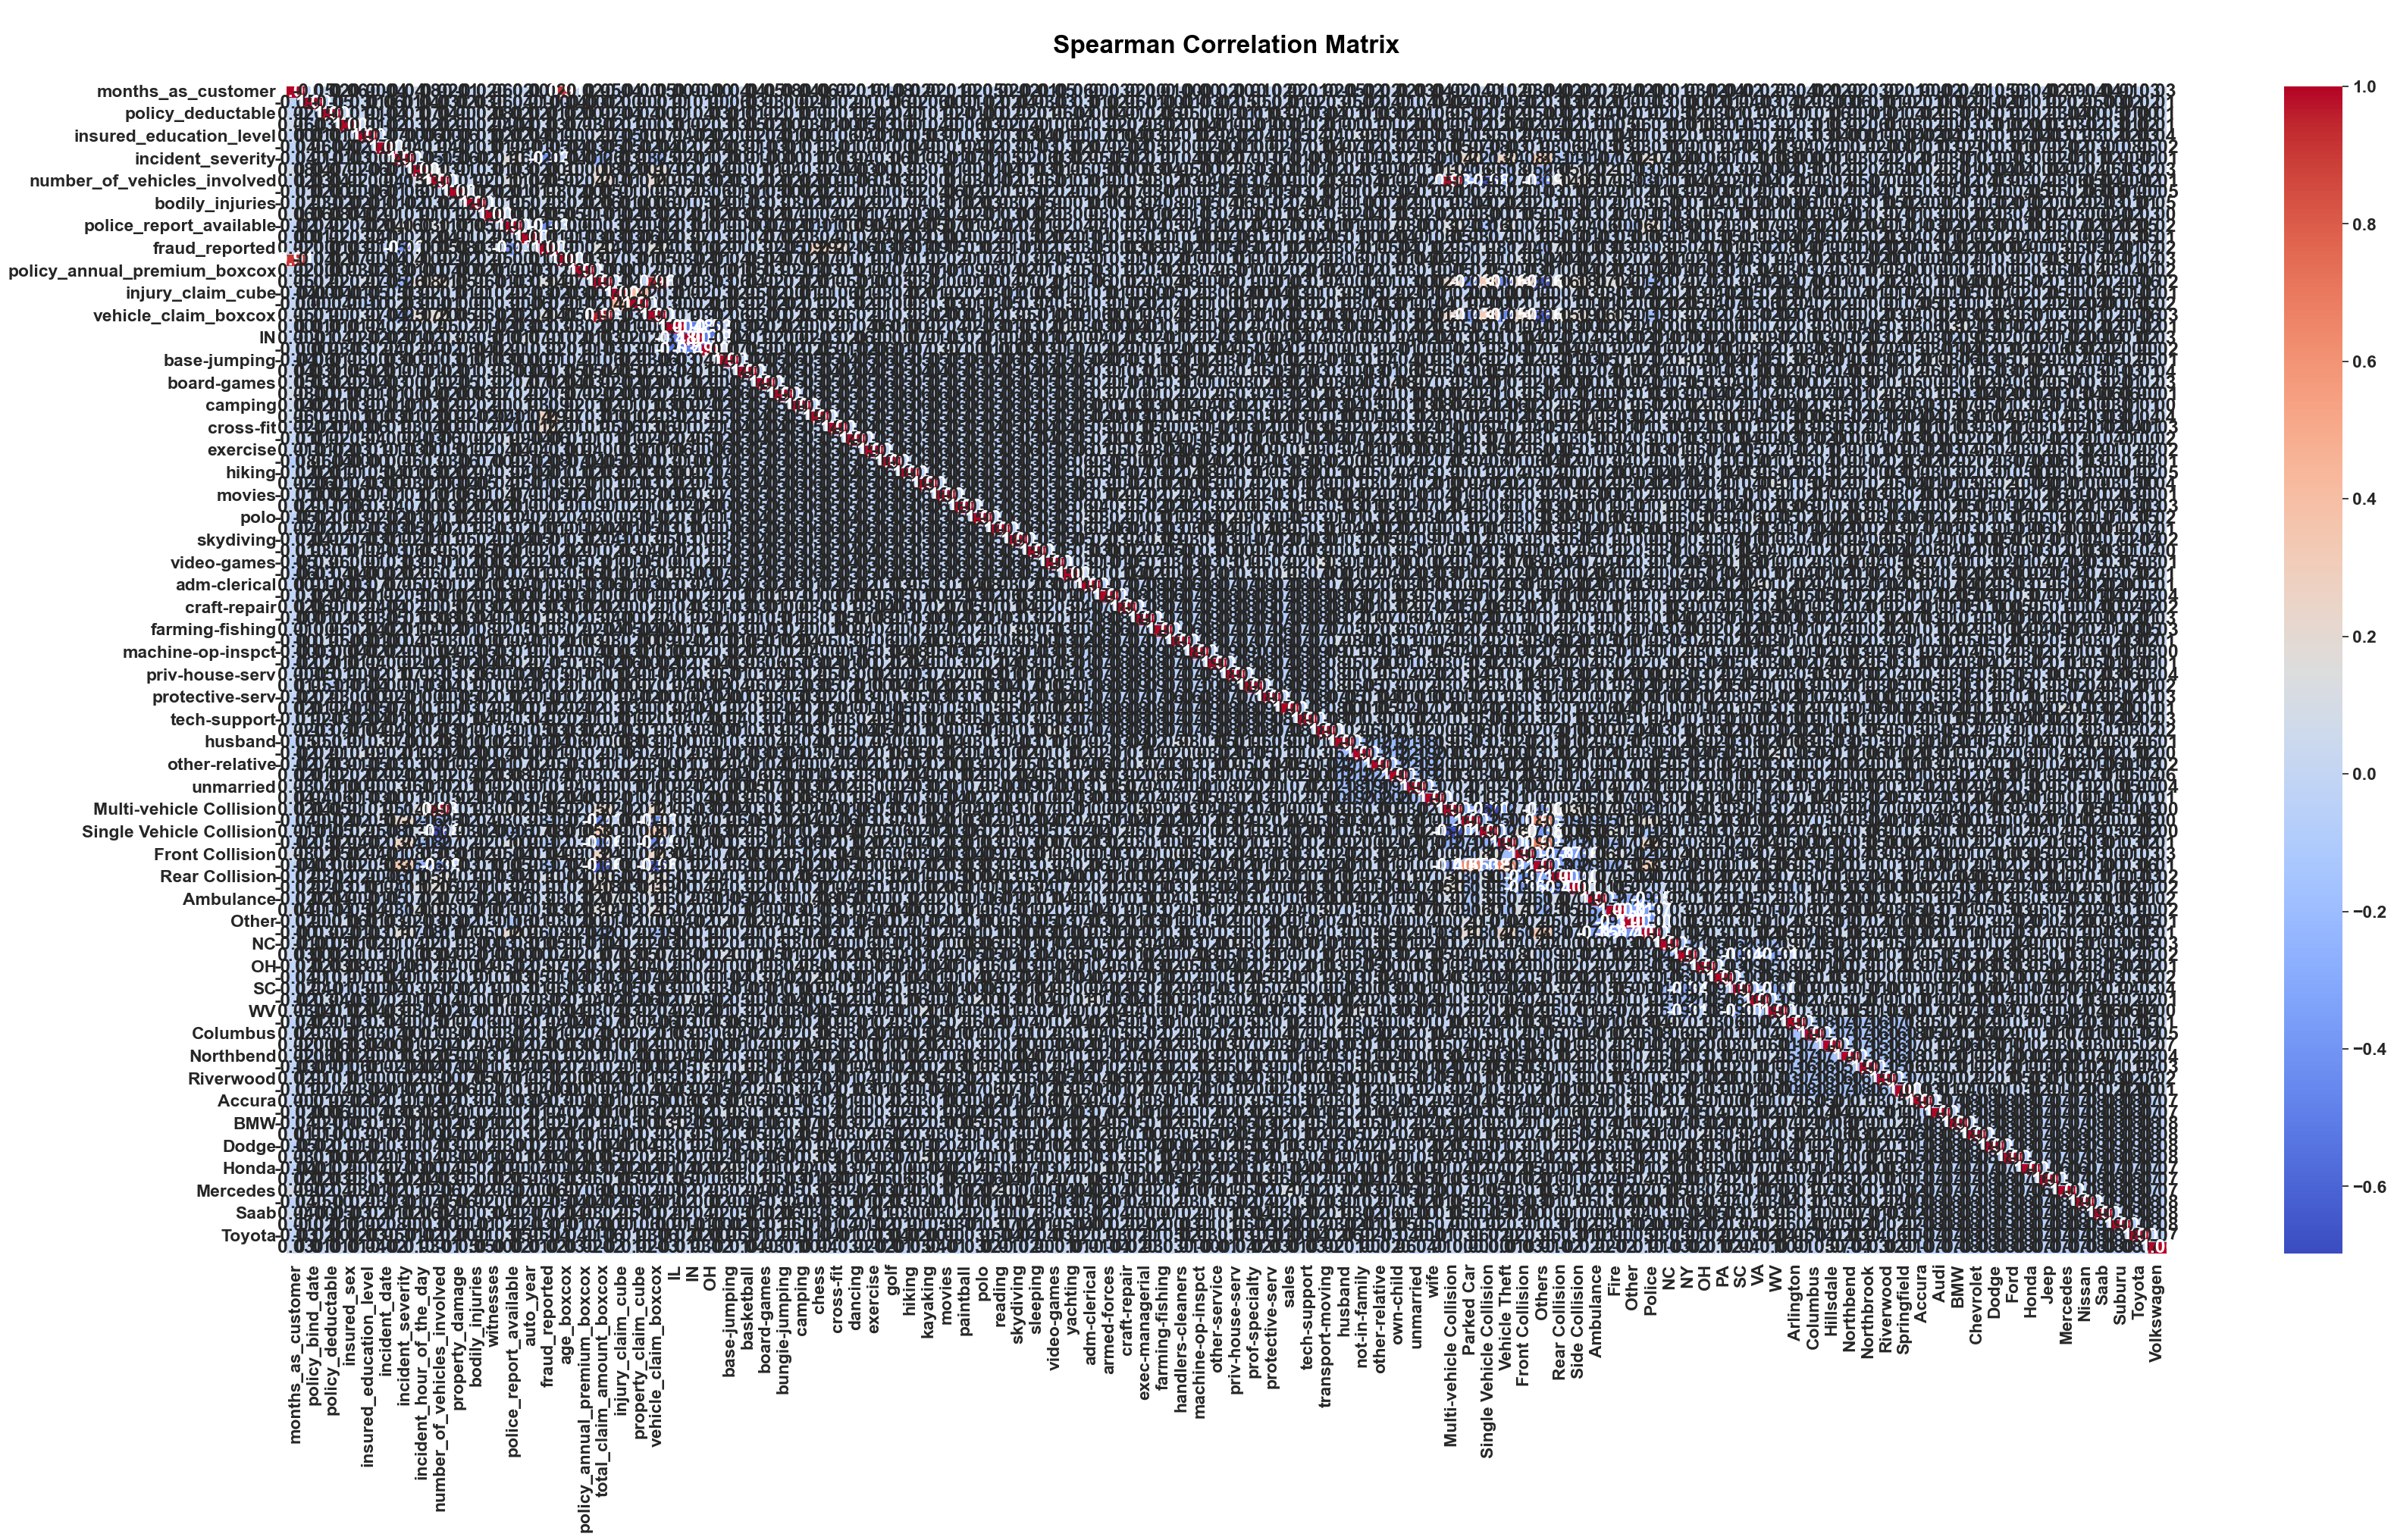

In [70]:
plt.figure(figsize=(40,20))
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

cor_col = df1
correlation_matrix = cor_col.corr(method='spearman')
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('\nSpearman Correlation Matrix\n',fontdict={'fontsize':24,'color':'black','fontweight':'bold'})

plt.show()

## <span style="color:Aqua;">Training all the model:</span>

#### <span style="color:Khaki;">Defing the function to train and evaluate the model:</span>

In [71]:
def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    
    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        # Binarize the output
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
        y_proba = model.predict_proba(x_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(3):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure()
        for i in range(3):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('ROC Curve for {0}'.format(type(model).__name__))
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f'{color_positive}ROC Curve not available for {type(model).__name__}{reset_color}')
    print('-'*40)


x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[continuous_columns])
x_test_scaled = scaler.transform(x_test[continuous_columns])

x_train_scaled_df = pd.concat([pd.DataFrame(x_train_scaled,columns=x_train[continuous_columns].columns).reset_index(drop=True), x_train[Ordinal_columns].reset_index(drop=True)],axis=1)
x_test_scaled_df = pd.concat([pd.DataFrame(x_test_scaled,columns=x_test[continuous_columns].columns).reset_index(drop=True),x_test[Ordinal_columns].reset_index(drop=True)],axis=1)


new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','credit_mix','outstanding_debt_square','credit_history_age_boxcox','total_liability_boxcox','credit_history_age_boxcox',
           ]

Accuracy Test  - 0.81805
Accuracy Train - 0.99875

In [72]:



new = ['annual_income_boxcox','monthly_inhand_salary_boxcox','num_bank_accounts','num_credit_card','interest_rate_boxcox',
           'num_of_loan','credit_mix','outstanding_debt_square','credit_history_age_boxcox','total_liability_boxcox','credit_history_age_boxcox',
           
        ]


DT_Classifier = DecisionTreeClassifier(random_state=33)
evaluate_model(DT_Classifier, x_train, y_train, x_test, y_test)

Accuracy Test  - 0.85
Accuracy Train - 1.0

Precision Test  - 0.85
Precision Train - 1.0

Recall Test  - 0.85
Recall Train - 1.0

F1_score Test  - 0.85
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[130  15]
 [ 15  40]]
Confusion Matrix Train -- 
[[608   0]
 [  0 192]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       145
           1       0.73      0.73      0.73        55

    accuracy                           0.85       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.85      0.85      0.85       200

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       192

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Balanced Accurac

IndexError: index 2 is out of bounds for axis 1 with size 2

                         Feature  Importance
4              incident_severity      0.2748
10       police_report_available      0.1589
26                         chess      0.1135
27                     cross-fit      0.0779
13  policy_annual_premium_boxcox      0.0691
..                           ...         ...
87                        Accura      0.0000
96                        Nissan      0.0000
95                      Mercedes      0.0000
97                          Saab      0.0000
99                        Toyota      0.0000

[101 rows x 2 columns]


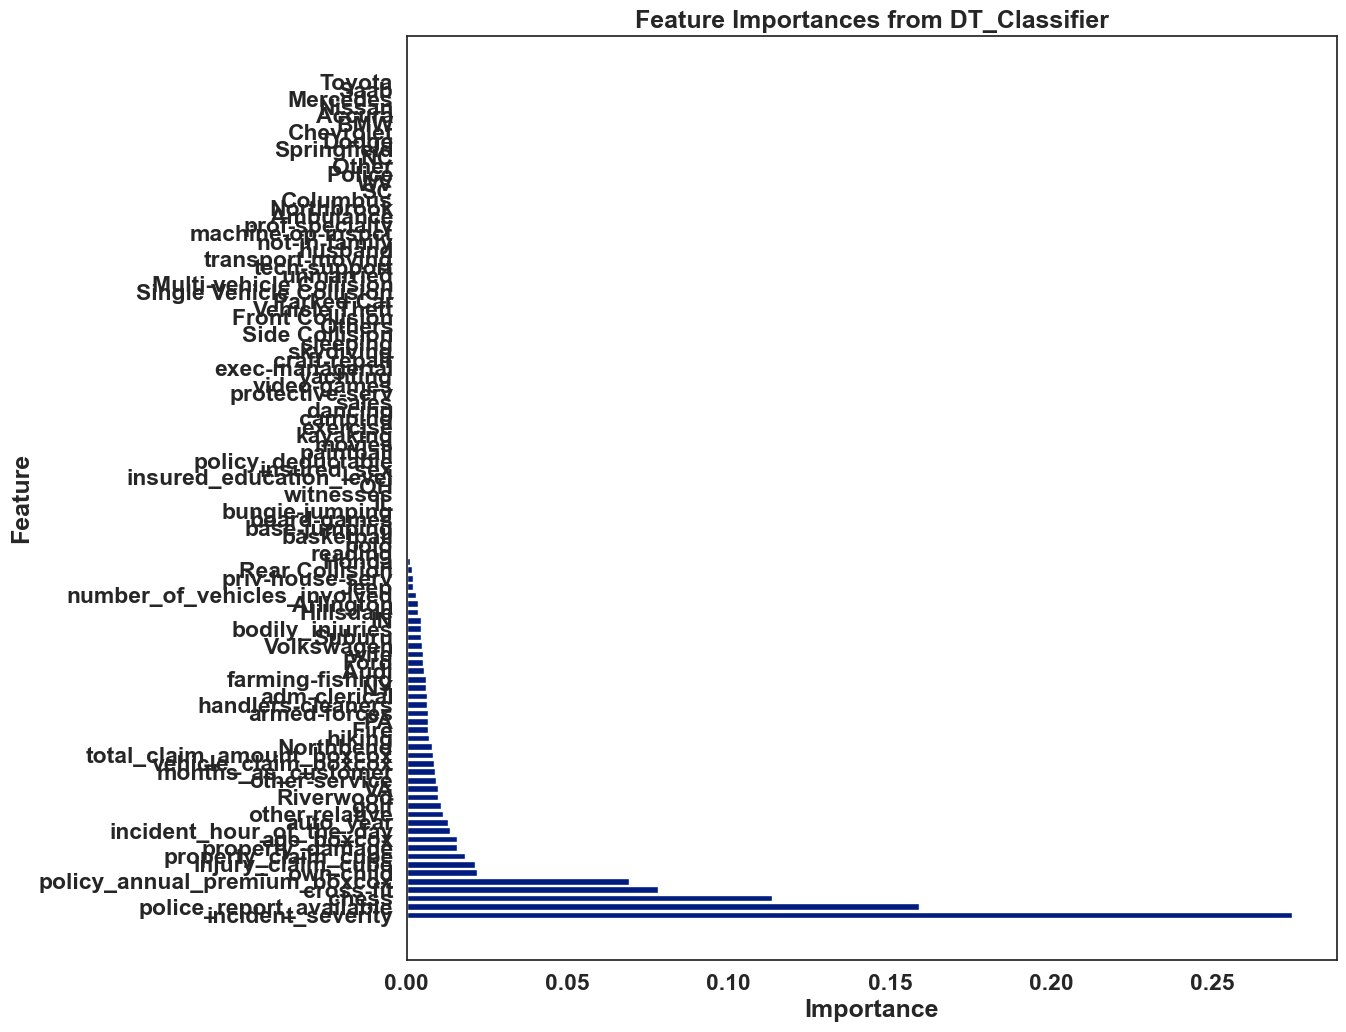

In [73]:
feature_importances = DT_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DT_Classifier')
plt.show()

In [74]:
RF_Classifier = RandomForestClassifier(random_state=33,n_jobs=-1)
evaluate_model(RF_Classifier,  x_train, y_train, x_test, y_test)

Accuracy Test  - 0.825
Accuracy Train - 1.0

Precision Test  - 0.8181089743589743
Precision Train - 1.0

Recall Test  - 0.825
Recall Train - 1.0

F1_score Test  - 0.8184754521963825
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[133  12]
 [ 23  32]]
Confusion Matrix Train -- 
[[608   0]
 [  0 192]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       145
           1       0.73      0.58      0.65        55

    accuracy                           0.82       200
   macro avg       0.79      0.75      0.77       200
weighted avg       0.82      0.82      0.82       200

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       192

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.

IndexError: index 2 is out of bounds for axis 1 with size 2

                         Feature  Importance
7        outstanding_debt_square      0.1501
4           interest_rate_boxcox      0.1306
8      credit_history_age_boxcox      0.1255
10     credit_history_age_boxcox      0.1196
6                     credit_mix      0.1064
9         total_liability_boxcox      0.1000
1   monthly_inhand_salary_boxcox      0.0672
0           annual_income_boxcox      0.0657
2              num_bank_accounts      0.0523
3                num_credit_card      0.0494
5                    num_of_loan      0.0332


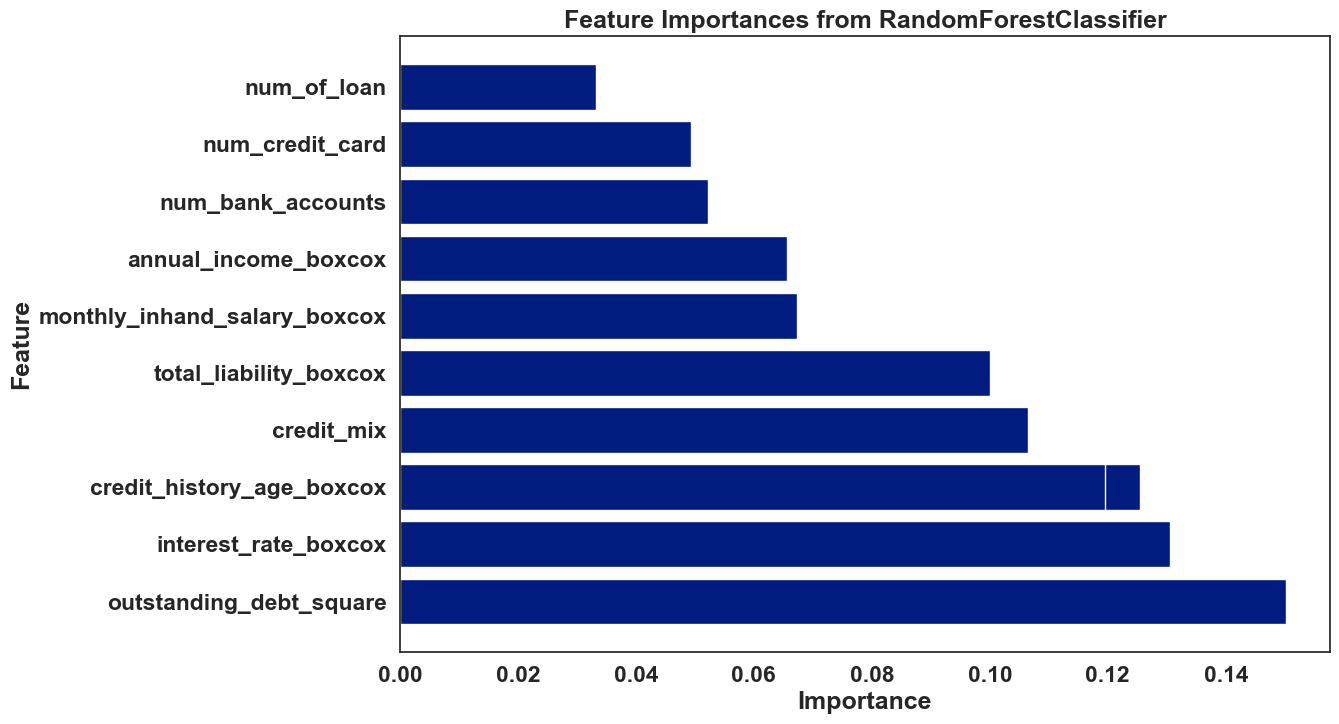

In [108]:
feature_importances = RF_Classifier.feature_importances_
# Map feature importances to feature names
feature_names =  x_train_scaled_df[new].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()


Accuracy Test  - 0.6736333333333333
Accuracy Train - 0.7398884435350506

Precision Test  - 0.7228405826634725
Precision Train - 0.7412392376127968

Recall Test  - 0.6736333333333333
Recall Train - 0.7398884435350506

F1_score Test  - 0.6780396447631433
F1_score Train - 0.7371645683561154

Confusion Matrix Test  -- 
[[6439  987 1379]
 [3405 9339 3129]
 [ 118  773 4431]]
Confusion Matrix Train -- 
[[26705  3391  5605]
 [ 6693 21560  6613]
 [  791  4747 30926]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.65      0.73      0.69      8805
           1       0.84      0.59      0.69     15873
           2       0.50      0.83      0.62      5322

    accuracy                           0.67     30000
   macro avg       0.66      0.72      0.67     30000
weighted avg       0.72      0.67      0.68     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.78      0.75      0.76  

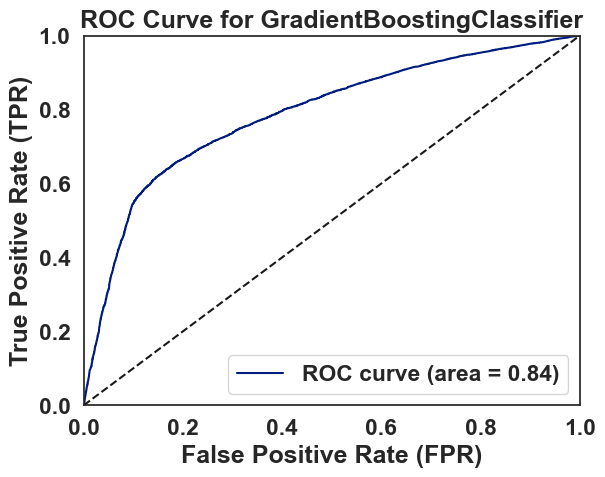

----------------------------------------


In [109]:
GB_Classifier = GradientBoostingClassifier(random_state=33)
evaluate_model(GB_Classifier, x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [75]:
xgb_Classifier = xg.XGBClassifier(random_state=33)
evaluate_model(xgb_Classifier, x_train[new], y_train, x_test[new], y_test)

AttributeError: 'DataFrame' object has no attribute 'dtype'

                                      Feature  Importance
31                                 credit_mix      0.2970
5                     outstanding_debt_square      0.1175
6                credit_utilization_ratio_log      0.0517
4                        interest_rate_boxcox      0.0472
32                      payment_of_min_amount      0.0457
22                     total_liability_boxcox      0.0370
26                            num_credit_card      0.0356
36                    credit_inquiry_per_loan      0.0353
25                          num_bank_accounts      0.0291
18               total_credit_exposure_boxcox      0.0284
35                                    Cluster      0.0262
30                     num_of_delayed_payment      0.0175
28                        delay_from_due_date      0.0147
29                       num_credit_inquiries      0.0147
33                          payment_behaviour      0.0142
11               credit_limit_change_rate_exp      0.0137
13            

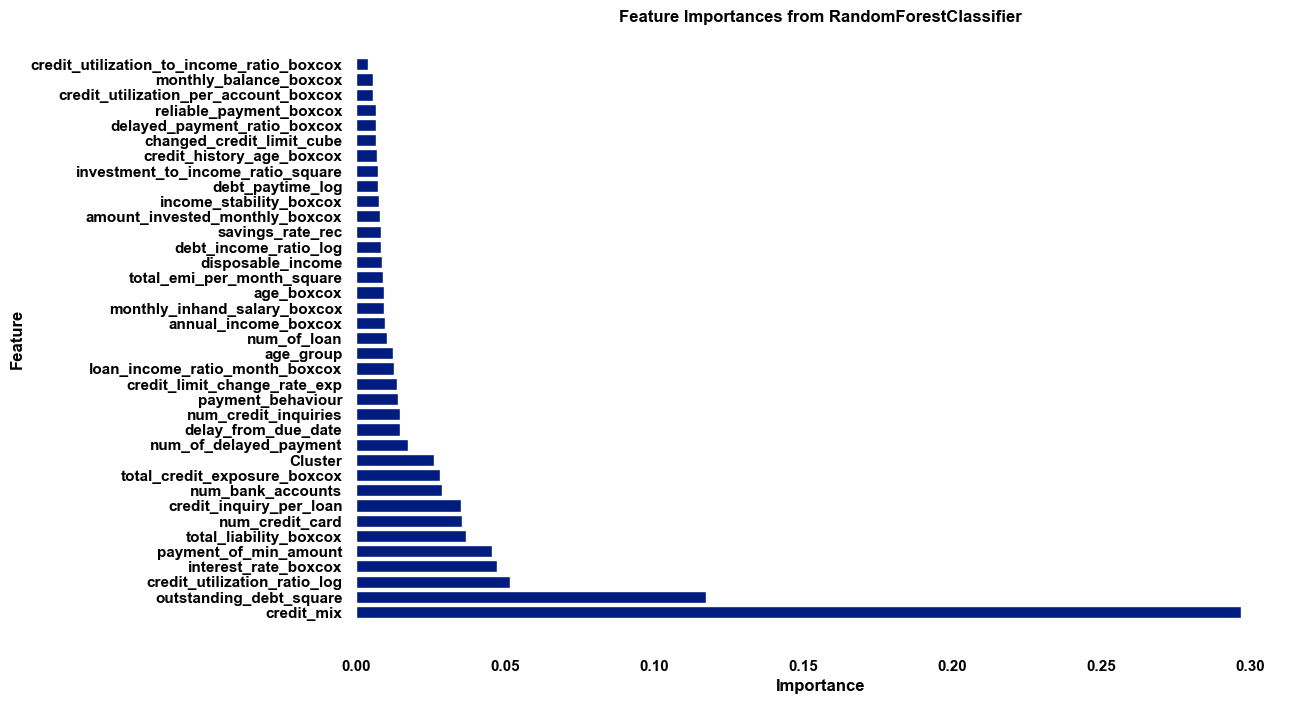

In [ ]:
# Get feature importances
feature_importances = xgb_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

/home/san/mnt/F/Technology/Python Project/Capstone/Banking_Analytics/banking/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy Test  - 0.83065
Accuracy Train - 0.99875

Precision Test  - 0.8305564674098396
Precision Train - 0.9987517393433045

Recall Test  - 0.83065
Recall Train - 0.99875

F1_score Test  - 0.8305864104140323
F1_score Train - 0.9987501096794551

Confusion Matrix Test  -- 
[[4893  978    3]
 [1010 8927  662]
 [   0  734 2793]]
Confusion Matrix Train -- 
[[23122     2     0]
 [   65 42504     6]
 [    0    27 14274]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5874
           1       0.84      0.84      0.84     10599
           2       0.81      0.79      0.80      3527

    accuracy                           0.83     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.83      0.83      0.83     20000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23124
           1       1.00      1.00  

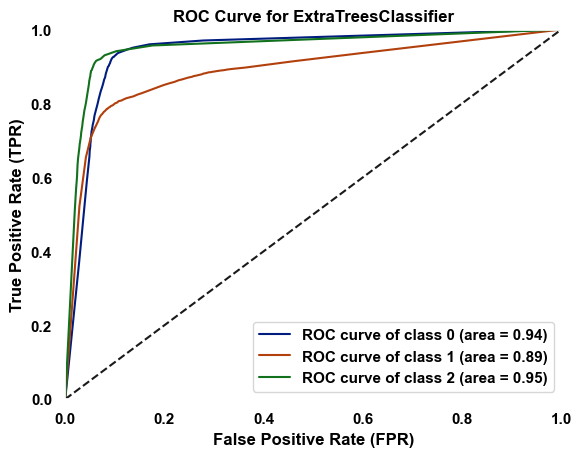

----------------------------------------


In [76]:
ET_Classifier =ExtraTreesClassifier(random_state=33,n_jobs=-1)
evaluate_model(ET_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

                         Feature  Importance
6                     credit_mix      0.1574
10     credit_history_age_boxcox      0.1288
8      credit_history_age_boxcox      0.1277
4           interest_rate_boxcox      0.1140
7        outstanding_debt_square      0.0868
9         total_liability_boxcox      0.0860
3                num_credit_card      0.0664
2              num_bank_accounts      0.0629
1   monthly_inhand_salary_boxcox      0.0591
0           annual_income_boxcox      0.0574
5                    num_of_loan      0.0535


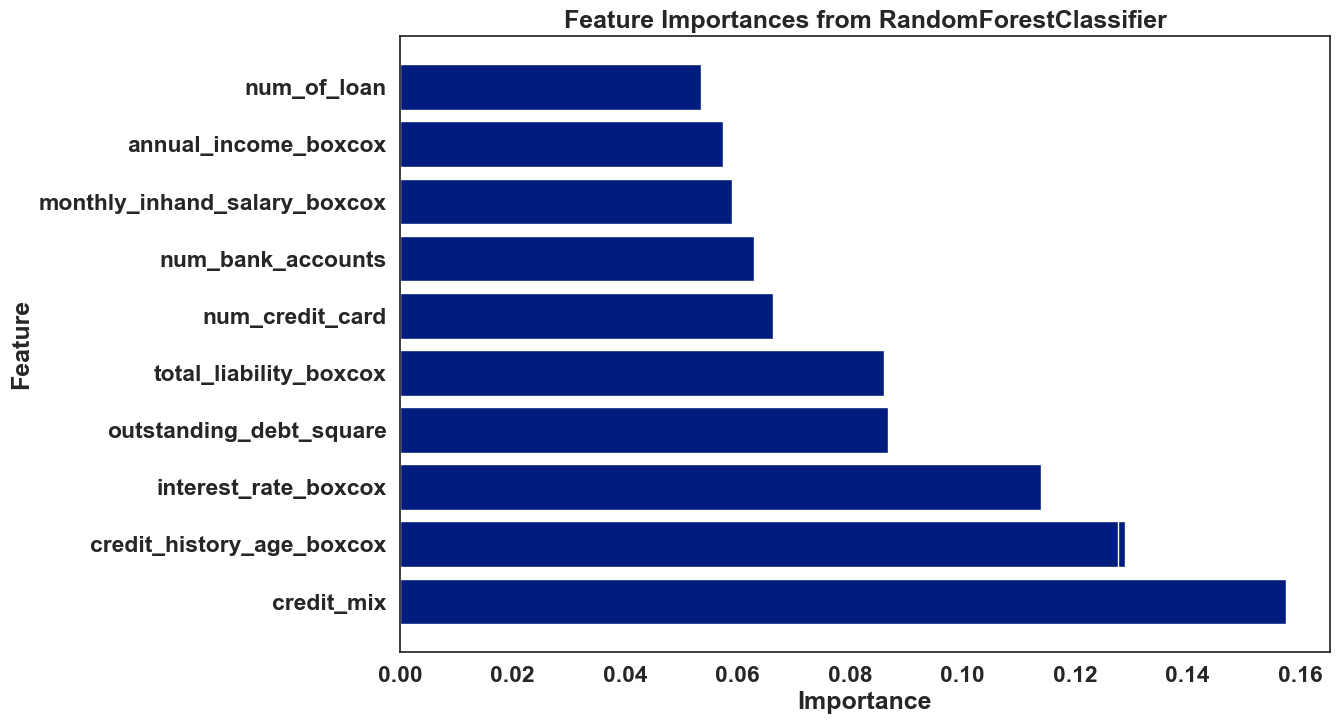

In [116]:
# Get feature importances
feature_importances = ET_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df[new].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForestClassifier')
plt.show()

Accuracy Test  - 0.646
Accuracy Train - 0.6963310715585712

Precision Test  - 0.6918951853930027
Precision Train - 0.6956021906685568

Recall Test  - 0.646
Recall Train - 0.6963310715585712

F1_score Test  - 0.6494025369924875
F1_score Train - 0.6941559753295288

Confusion Matrix Test  -- 
[[5977 1404 1424]
 [3729 8983 3161]
 [ 157  745 4420]]
Confusion Matrix Train -- 
[[24521  5634  5561]
 [ 7570 20624  6728]
 [  954  6089 29462]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      8805
           1       0.81      0.57      0.67     15873
           2       0.49      0.83      0.62      5322

    accuracy                           0.65     30000
   macro avg       0.63      0.69      0.64     30000
weighted avg       0.69      0.65      0.65     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     35716
           1     

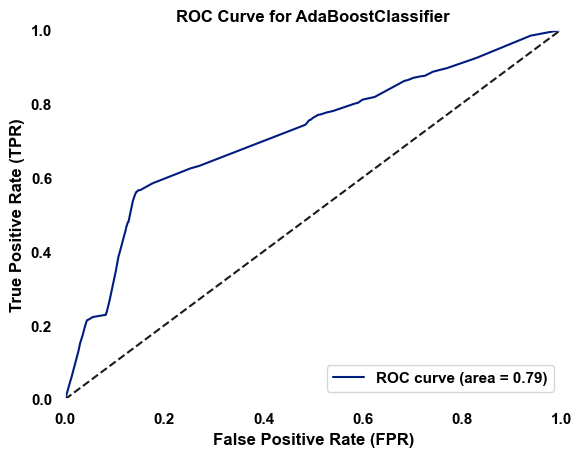

----------------------------------------


In [106]:
ADA_Classifier =AdaBoostClassifier(algorithm='SAMME',random_state=42,)
evaluate_model(ADA_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)


                           Feature  Importance
0                       credit_mix      0.3020
1                  num_credit_card      0.2368
2          outstanding_debt_square      0.1150
3   loan_income_ratio_month_boxcox      0.0671
4             interest_rate_boxcox      0.0635
8     total_credit_exposure_boxcox      0.0553
6                payment_behaviour      0.0428
5            payment_of_min_amount      0.0414
9              delay_from_due_date      0.0300
10         credit_inquiry_per_loan      0.0236
7     credit_limit_change_rate_exp      0.0225


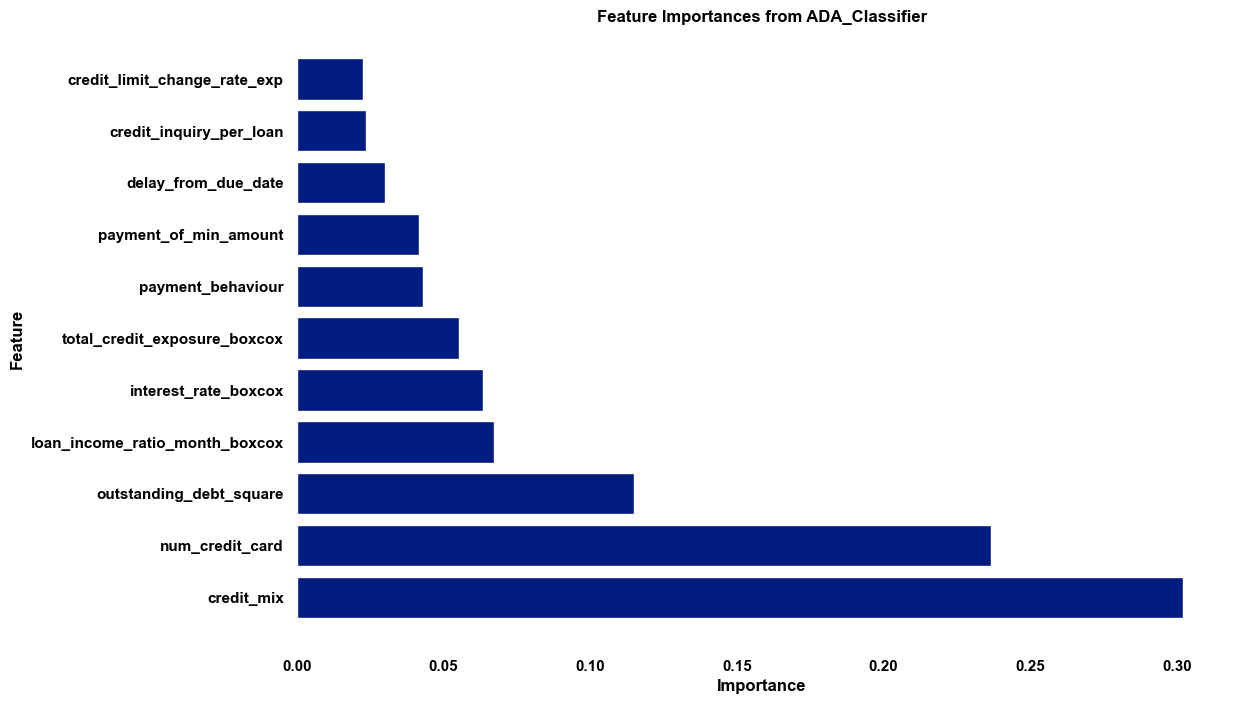

In [54]:
# Get feature importances
feature_importances = ADA_Classifier.feature_importances_

# Map feature importances to feature names
feature_names =  x_train_scaled_df[ADA_fea].columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from ADA_Classifier')
plt.show()

In [74]:
params = {'n_neighbors' : [2,3,4,5,6,7]}

KNN_grid_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=3, scoring='accuracy',verbose=3, n_jobs=1,error_score='raise')

KNN_grid_model.fit(x_train_scaled_df[new],y_train)




Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....................n_neighbors=2;, score=0.833 total time=   3.0s
[CV 2/3] END .....................n_neighbors=2;, score=0.838 total time=   2.2s
[CV 3/3] END .....................n_neighbors=2;, score=0.824 total time=   2.1s
[CV 1/3] END .....................n_neighbors=3;, score=0.839 total time=   2.2s
[CV 2/3] END .....................n_neighbors=3;, score=0.836 total time=   2.2s
[CV 3/3] END .....................n_neighbors=3;, score=0.826 total time=   2.1s
[CV 1/3] END .....................n_neighbors=4;, score=0.822 total time=   2.1s
[CV 2/3] END .....................n_neighbors=4;, score=0.823 total time=   2.0s
[CV 3/3] END .....................n_neighbors=4;, score=0.811 total time=   2.1s
[CV 1/3] END .....................n_neighbors=5;, score=0.814 total time=   2.2s
[CV 2/3] END .....................n_neighbors=5;, score=0.813 total time=   2.1s
[CV 3/3] END .....................n_neighbors=5;,

GridSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=1, param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=3)

In [75]:
KNN_grid_model.best_params_

{'n_neighbors': 3}

Accuracy Test  - 0.82
Accuracy Train - 0.9162

Precision Test  - 0.82197793370418
Precision Train - 0.9187227493050727

Recall Test  - 0.82
Recall Train - 0.9162

F1_score Test  - 0.8201205054534774
F1_score Train - 0.9162858578282268

Confusion Matrix Test  -- 
[[5051  821    2]
 [1281 8479  839]
 [   3  654 2870]]
Confusion Matrix Train -- 
[[22045  1076     3]
 [ 2926 37796  1853]
 [    6   840 13455]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      5874
           1       0.85      0.80      0.83     10599
           2       0.77      0.81      0.79      3527

    accuracy                           0.82     20000
   macro avg       0.81      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000

Classification Report Train
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     23124
           1       0.95      0.89      0.92  

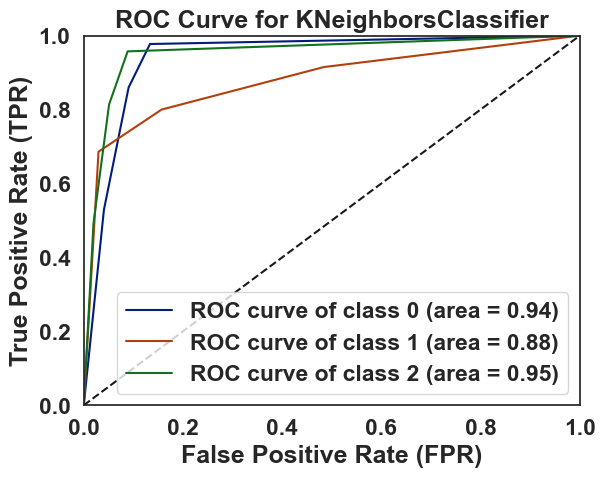

----------------------------------------


In [102]:
KN_Classifier = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
evaluate_model(KN_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [81]:
RF_Classifier = RandomForestClassifier(random_state=42)


param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf' :[1,3,6,9],
    'max_leaf_nodes' :[2,6,12,24]

}
kf=KFold(n_splits=3,shuffle=True,random_state=42)

scorer = make_scorer(f1_score, pos_label='macro')
kf=KFold(n_splits=3,shuffle=True,random_state=42)


grid_search = GridSearchCV( estimator= RF_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, scoring=scorer)
grid_search.fit( x_train_scaled_df[imp_fea], y_train,)
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\santhosh\Banking_Analytics\Banking_Analytics\banking\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 20, 'max_leaf_nodes': 24, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
np.unique(y_train)

array([0, 1, 2], dtype=int8)

In [45]:
ET_Classifier =ExtraTreesClassifier(random_state=42,)

param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [4, 10],
}

scorer = make_scorer(f1_score, average='macro')
kf=KFold(n_splits=3,shuffle=True,random_state=42)

ET_grid_search = GridSearchCV( estimator= ET_Classifier, param_grid=param_grid, cv = kf, n_jobs=-1, verbose = 2, scoring=scorer,return_train_score=True)
ET_grid_search.fit( x_train_scaled_df[ET_revised], y_train,)
best_params = ET_grid_search.best_params_
print(best_params)
ET_best = ExtraTreesClassifier(**best_params, random_state=42)
evaluate_model(ET_best, x_train_scaled_df[ET_revised], y_train, x_test_scaled_df[ET_revised], y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Accuracy Test  - 0.8054
Accuracy Train - 0.84515

Precision Test  - 0.8183628377123722
Precision Train - 0.8611557277798958

Recall Test  - 0.8054
Recall Train - 0.84515

F1_score Test  - 0.8054193745546786
F1_score Train - 0.8449039240648435

Confusion Matrix Test  -- 
[[5203  612   59]
 [1545 7803 1251]
 [   7  418 3102]]
Confusion Matrix Train -- 
[[21601  1421   102]
 [ 5546 32537  4492]
 [    9   818 13474]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      5874
           1       0.88      0.74      0.80     10599
           2       0.70      0.88      0.78      3527

    accuracy                           0.81     20000
   macro avg       0.79      0.83      0.80     20000
weighted avg       0.82      0.81      0.81     20000

Classification Report Train
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     23124
           1       0.94      0.76    

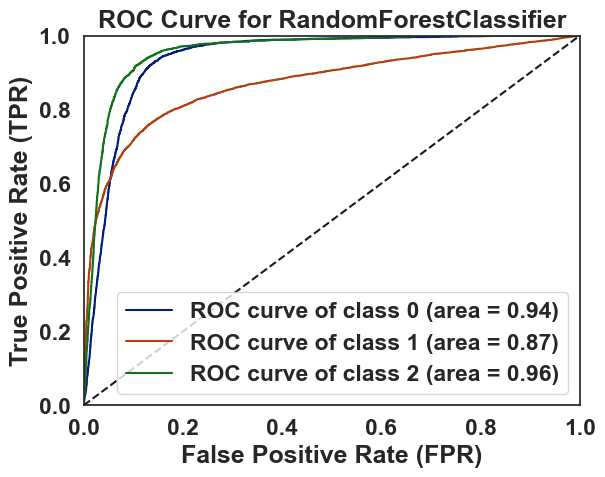

----------------------------------------


In [103]:
# min_samples_leaf=6
RF_Classifier = RandomForestClassifier(n_estimators=10,random_state=33,min_samples_leaf=6,n_jobs=-1,class_weight='balanced',ccp_alpha=0.00001,
                                       )
evaluate_model(RF_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

Accuracy Test  - 0.803
Accuracy Train - 0.8459375

Precision Test  - 0.8231032772821827
Precision Train - 0.8702517834888489

Recall Test  - 0.803
Recall Train - 0.8459375

F1_score Test  - 0.8022849647086555
F1_score Train - 0.8451129744394434

Confusion Matrix Test  -- 
[[5379  474   21]
 [1642 7505 1452]
 [   6  345 3176]]
Confusion Matrix Train -- 
[[22140   961    23]
 [ 5829 31573  5173]
 [    3   336 13962]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.77      0.92      0.83      5874
           1       0.90      0.71      0.79     10599
           2       0.68      0.90      0.78      3527

    accuracy                           0.80     20000
   macro avg       0.78      0.84      0.80     20000
weighted avg       0.82      0.80      0.80     20000

Classification Report Train
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     23124
           1       0.96      0.74  

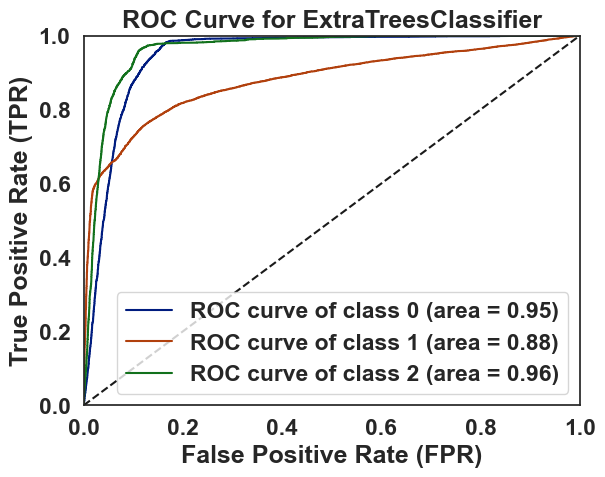

----------------------------------------


In [105]:
ET_Classifier =ExtraTreesClassifier(n_estimators=50,random_state=33,min_samples_leaf=4,n_jobs=-1,max_depth=25,class_weight='balanced')
evaluate_model(ET_Classifier,  x_train_scaled_df[new], y_train, x_test_scaled_df[new], y_test)

In [108]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
RF_cv_score = cross_val_score(RF_Classifier,x_train_scaled_df[new],y_train, cv=kf)
print(f'Cross validations scores \n\n {RF_cv_score}\n\n')
print(f'Cross validations scores mean \n\n {np.mean(RF_cv_score)}')

Cross validations scores 

 [0.797125 0.7955   0.7955   0.799875 0.8025   0.80625  0.806875 0.8005
 0.80475  0.7965  ]


Cross validations scores mean 

 0.8005375000000001


In [107]:
os.makedirs('pkls', exist_ok=True)
with open(r'pkls/RF_model.pkl', 'wb') as f:
    pickle.dump(RF_Classifier,f)